In [2]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
iris=load_iris()
iris.data.shape

(150, 4)

In [5]:
import pandas as pd
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
25,5.0,3.0,1.6,0.2,0
75,6.6,3.0,4.4,1.4,1
101,5.8,2.7,5.1,1.9,2
7,5.0,3.4,1.5,0.2,0
47,4.6,3.2,1.4,0.2,0


In [16]:
newdf=df[iris.target!=0]
newdf=newdf[['sepal length (cm)','petal length (cm)','species']]
newdf.sample(5)

,sepal length (cm),petal length (cm),species
71,6.1,4.0,versicolor
92,5.8,4.0,versicolor
116,6.5,5.5,virginica
77,6.7,5.0,versicolor
130,7.4,6.1,virginica


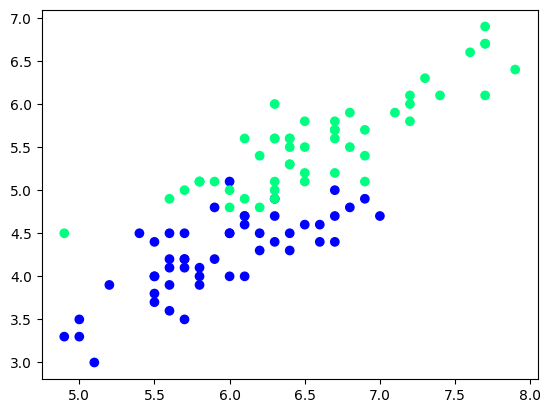

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(newdf['sepal length (cm)'],newdf['petal length (cm)'],c=newdf['species'],cmap='winter')

In [46]:
newdf=newdf.sample(100)
df_train=newdf.iloc[:60,:].sample(10)
df_val=newdf.iloc[60:80,:].sample(5)
df_test=newdf.iloc[80:,:].sample(5)

In [47]:
df_val

,sepal length (cm),petal length (cm),species
140,6.7,5.6,2
63,6.1,4.7,1
121,5.6,4.9,2
110,6.5,5.1,2
130,7.4,6.1,2


In [48]:
x_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [55]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

CASE 1-BAGGING

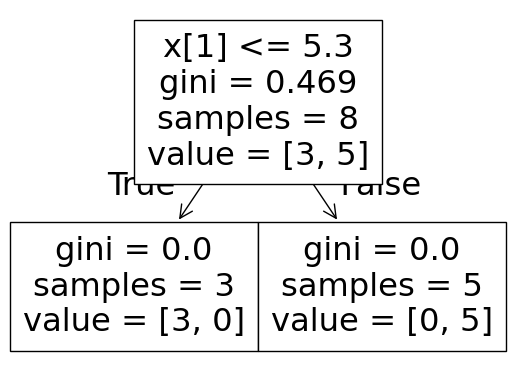

c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


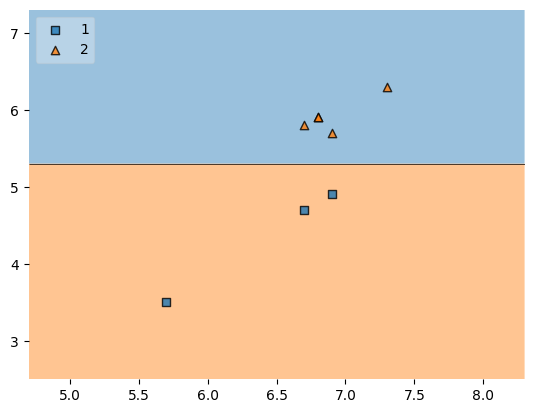

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
df_bag=df_train.sample(8,replace=True) #replace=True means repeated may exits
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[0:,-1]
df_bag1=DecisionTreeClassifier()
evaluate(df_bag1,x,y)

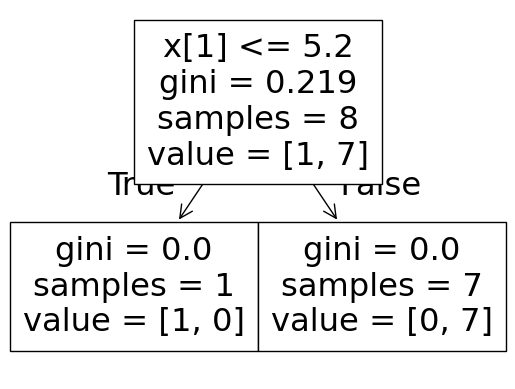

0.6


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


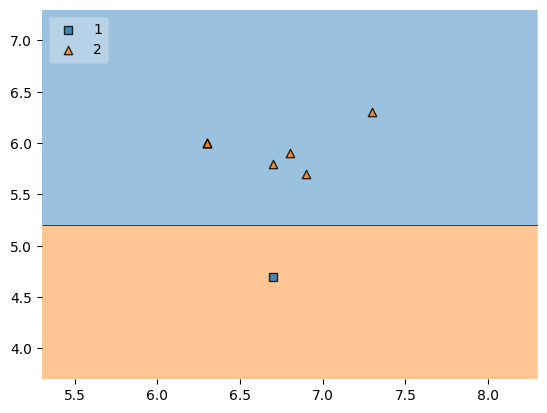

In [51]:
df_bag=df_train.sample(8,replace=True) #replace=True means repeated may exits
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[0:,-1]
df_bag2=DecisionTreeClassifier()
evaluate(df_bag2,x,y)

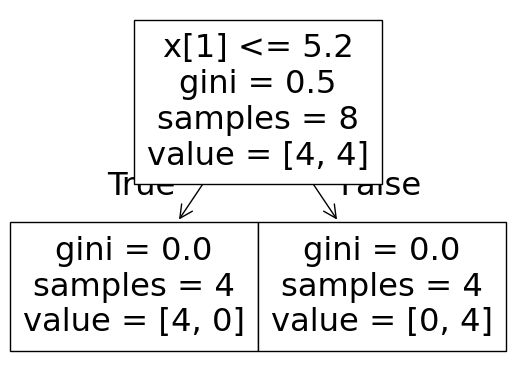

c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


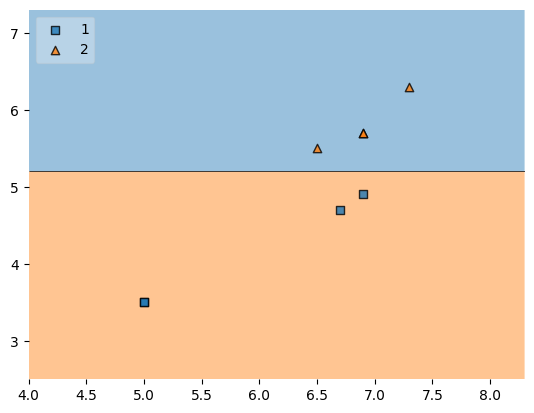

In [52]:
df_bag=df_train.sample(8,replace=True) #replace=True means repeated may exits
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[0:,-1]
df_bag3=DecisionTreeClassifier()
evaluate(df_bag3,x,y)

In [53]:
df_test

,sepal length (cm),petal length (cm),species
137,6.4,5.5,2
103,6.3,5.6,2
145,6.7,5.2,2
113,5.7,5.0,2
105,7.6,6.6,2


In [54]:
import numpy as np
print('predictor 1',df_bag1.predict(np.array([6.1,4.6]).reshape(1,2)))
print('predictor 2',df_bag2.predict(np.array([6.1,4.6]).reshape(1,2)))
print('predictor 3',df_bag3.predict(np.array([6.1,4.6]).reshape(1,2)))


predictor 1 [1]
predictor 2 [1]
predictor 3 [1]


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


PASTING:
    SAME AS BAGGING BUT NO REPETATION

RANDOM SUBSPACES: COLUMNS SAMPLING

RANDOM PATCHES:BOTH ROW AND COLUMN SAMPLING 